<a href="https://colab.research.google.com/github/iamrestrepo/framingham-data-mining/blob/main/Data_Mining_Project_Heart_Attack_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score


from google.colab import drive

drive.mount('/content/gdrive');

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
# df = pd.read_csv('framingham.csv') 
df = pd.read_csv('/content/gdrive/MyDrive/data_mining/framingham.csv')
df.head(20)

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0
5,female,43,2.0,No,0.0,0.0,0,1,No,228.0,180.0,110.0,30.30,77.0,99.0,0
6,female,63,1.0,No,0.0,0.0,0,0,No,205.0,138.0,71.0,33.11,60.0,85.0,1
7,female,45,2.0,Yes,20.0,0.0,0,0,No,313.0,100.0,71.0,21.68,79.0,78.0,0
8,male,52,1.0,No,0.0,0.0,0,1,No,260.0,141.5,89.0,26.36,76.0,79.0,0
9,male,43,1.0,Yes,30.0,0.0,0,1,No,225.0,162.0,107.0,23.61,93.0,88.0,0


Pre-Processing Data

In [81]:
#Checks for Duplicates
duplicate_df = df[df.duplicated()]
duplicate_df

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [82]:
df.isna().sum()
null = df[df.isna().any(axis=1)]
null

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,female,39,2.0,Yes,9.0,0.0,0,0,No,226.0,114.0,64.0,22.35,85.0,NaN,0
21,female,43,1.0,No,0.0,0.0,0,0,No,185.0,123.5,77.5,29.89,70.0,NaN,0
26,female,60,1.0,No,0.0,0.0,0,0,No,260.0,110.0,72.5,26.59,65.0,NaN,0
33,male,61,NaN,Yes,5.0,0.0,0,0,No,175.0,134.0,82.5,18.59,72.0,75.0,1
36,male,56,NaN,No,0.0,0.0,0,0,No,257.0,153.5,102.0,28.09,72.0,75.0,0
42,female,52,1.0,No,0.0,1.0,0,1,No,NaN,148.0,92.0,25.09,70.0,NaN,1
49,male,36,3.0,Yes,20.0,NaN,0,1,No,194.0,139.0,93.0,24.33,80.0,62.0,0
54,female,39,2.0,Yes,20.0,0.0,0,0,No,209.0,115.0,75.0,22.54,90.0,NaN,0
70,female,63,4.0,No,0.0,0.0,0,0,No,248.0,164.5,76.0,29.35,70.0,NaN,0
72,female,37,NaN,No,0.0,0.0,0,0,No,200.0,119.0,79.0,33.29,67.0,87.0,0


In [83]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Handling Null Values and Ennumerating Strings/Objects by converting to Binary

In [84]:
#Missing values in Education
eduMiss=df[df['education'].isnull()].index
eduMiss

Int64Index([  33,   36,   72,  184,  213,  293,  305,  306,  319,  400,
            ...
            3764, 3868, 3873, 3943, 4012, 4082, 4098, 4121, 4122, 4138],
           dtype='int64', length=105)

In [85]:
#Drop All null values in Education.
df=df.drop(eduMiss)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4135 non-null   object 
 1   age              4135 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4135 non-null   object 
 4   cigsPerDay       4108 non-null   float64
 5   BPMeds           4082 non-null   float64
 6   prevalentStroke  4135 non-null   int64  
 7   prevalentHyp     4135 non-null   int64  
 8   diabetes         4135 non-null   object 
 9   totChol          4086 non-null   float64
 10  sysBP            4135 non-null   float64
 11  diaBP            4135 non-null   float64
 12  BMI              4117 non-null   float64
 13  heartRate        4134 non-null   float64
 14  glucose          3755 non-null   float64
 15  TenYearCHD       4135 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 549.2+ KB


In [87]:
#Turning Yes/No values to Binary
df = df.replace(['Yes'],1)
df = df.replace(['No'],0)

In [88]:
#Turning Male and Female into Binary
df['Sex'] = (df['Sex'] == 'male').astype(int)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4135 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4135 non-null   int64  
 1   age              4135 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4135 non-null   int64  
 4   cigsPerDay       4108 non-null   float64
 5   BPMeds           4082 non-null   float64
 6   prevalentStroke  4135 non-null   int64  
 7   prevalentHyp     4135 non-null   int64  
 8   diabetes         4135 non-null   int64  
 9   totChol          4086 non-null   float64
 10  sysBP            4135 non-null   float64
 11  diaBP            4135 non-null   float64
 12  BMI              4117 non-null   float64
 13  heartRate        4134 non-null   float64
 14  glucose          3755 non-null   float64
 15  TenYearCHD       4135 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 549.2 KB


In [90]:
# Null values in Cigs per day are non smokers.
cigIndex = df[df['cigsPerDay'].isnull()].index
cigIndex

Int64Index([ 131,  139, 1046, 1292, 1347, 1451, 1497, 1610, 1625, 1870, 1963,
            1980, 2405, 2513, 3021, 3094, 3106, 3108, 3156, 3177, 3309, 3432,
            3579, 3715, 3847, 3924, 3942],
           dtype='int64')

In [91]:
smoke_status = []
for i in cigIndex:
   smoke_status.append(df['currentSmoker'][i])

In [92]:
smoke_status

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [93]:
smokers = df[df['currentSmoker'] == 1].index
smokers

Int64Index([   2,    3,    4,    7,    9,   12,   14,   15,   16,   17,
            ...
            4224, 4225, 4227, 4229, 4230, 4233, 4234, 4235, 4236, 4239],
           dtype='int64', length=2046)

In [94]:
numOfcigarettes = []
for i in smokers:
     if df['cigsPerDay'][i] != 'nan':
        numOfcigarettes.append(df['cigsPerDay'][i])

In [95]:
len(numOfcigarettes)

2046

In [96]:
import statistics
medianSmoker = statistics.median(numOfcigarettes)
medianSmoker

20.0

In [97]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(medianSmoker)

In [98]:
df.isnull().sum()

Sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            380
TenYearCHD           0
dtype: int64

In [99]:
BPmissing= df[df['BPMeds'].isnull()].index
BPmissing

Int64Index([  49,   77,  193,  245,  314,  395,  421,  765,  769,  797,  998,
            1002, 1044, 1104, 1122, 1177, 1206, 1284, 1301, 1566, 1573, 1616,
            1721, 1857, 1861, 1913, 1983, 1985, 1986, 2002, 2074, 2120, 2173,
            2181, 2367, 2608, 2645, 2738, 2835, 2943, 3226, 3313, 3373, 3375,
            3526, 3644, 3737, 3791, 3816, 4008, 4139, 4162, 4235],
           dtype='int64')

In [100]:
for i in BPmissing:
    if ( df['sysBP'][i] > 140 or df['diaBP'][i] > 90 ):
        df.loc[i,'BPMeds'] = 1.0  
    else:
        df.loc[i,'BPMeds'] = 0.0

In [101]:
df['totChol'] = df['totChol'].fillna(round(df['totChol'].mean()))

In [102]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())


In [103]:
df['glucose'] = df['glucose'].fillna(round(df['glucose'].mean()))

In [104]:
HRmissing = df[df['heartRate'].isnull()].index
HRmissing

Int64Index([689], dtype='int64')

In [105]:
df['heartRate'] = df['heartRate'].fillna(round(df['heartRate'].mean()))


In [106]:
df.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

EDA : Exploratory Data Analysis Begins

In [107]:
#Education Doesn't Have Any Significance. So, it will be dropped
df.drop('education', axis=1, inplace=True)

In [108]:
#Prints 2nd Row
print( 'Shape of Heart Prediction: {}'.format(df.shape))
print (df.loc[1])

Shape of Heart Prediction: (4135, 15)
Sex                  0.00
age                 46.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            250.00
sysBP              121.00
diaBP               81.00
BMI                 28.73
heartRate           95.00
glucose             76.00
TenYearCHD           0.00
Name: 1, dtype: float64


In [109]:
df.describe()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000,4135.000000
mean,0.427328,49.552358,0.494800,9.104474,0.034341,0.006046,0.311245,0.025635,236.642080,132.369287,82.876663,25.777345,75.922854,81.943652,0.151874
std,0.494750,8.562421,0.500033,11.920829,0.182126,0.077530,0.463059,0.158062,43.910468,22.075401,11.952176,4.074079,12.046881,22.855967,0.358942
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,143.750000,89.500000,27.985000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [110]:
df.tail()


,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa89dcc86d0>,
      dtype=object)

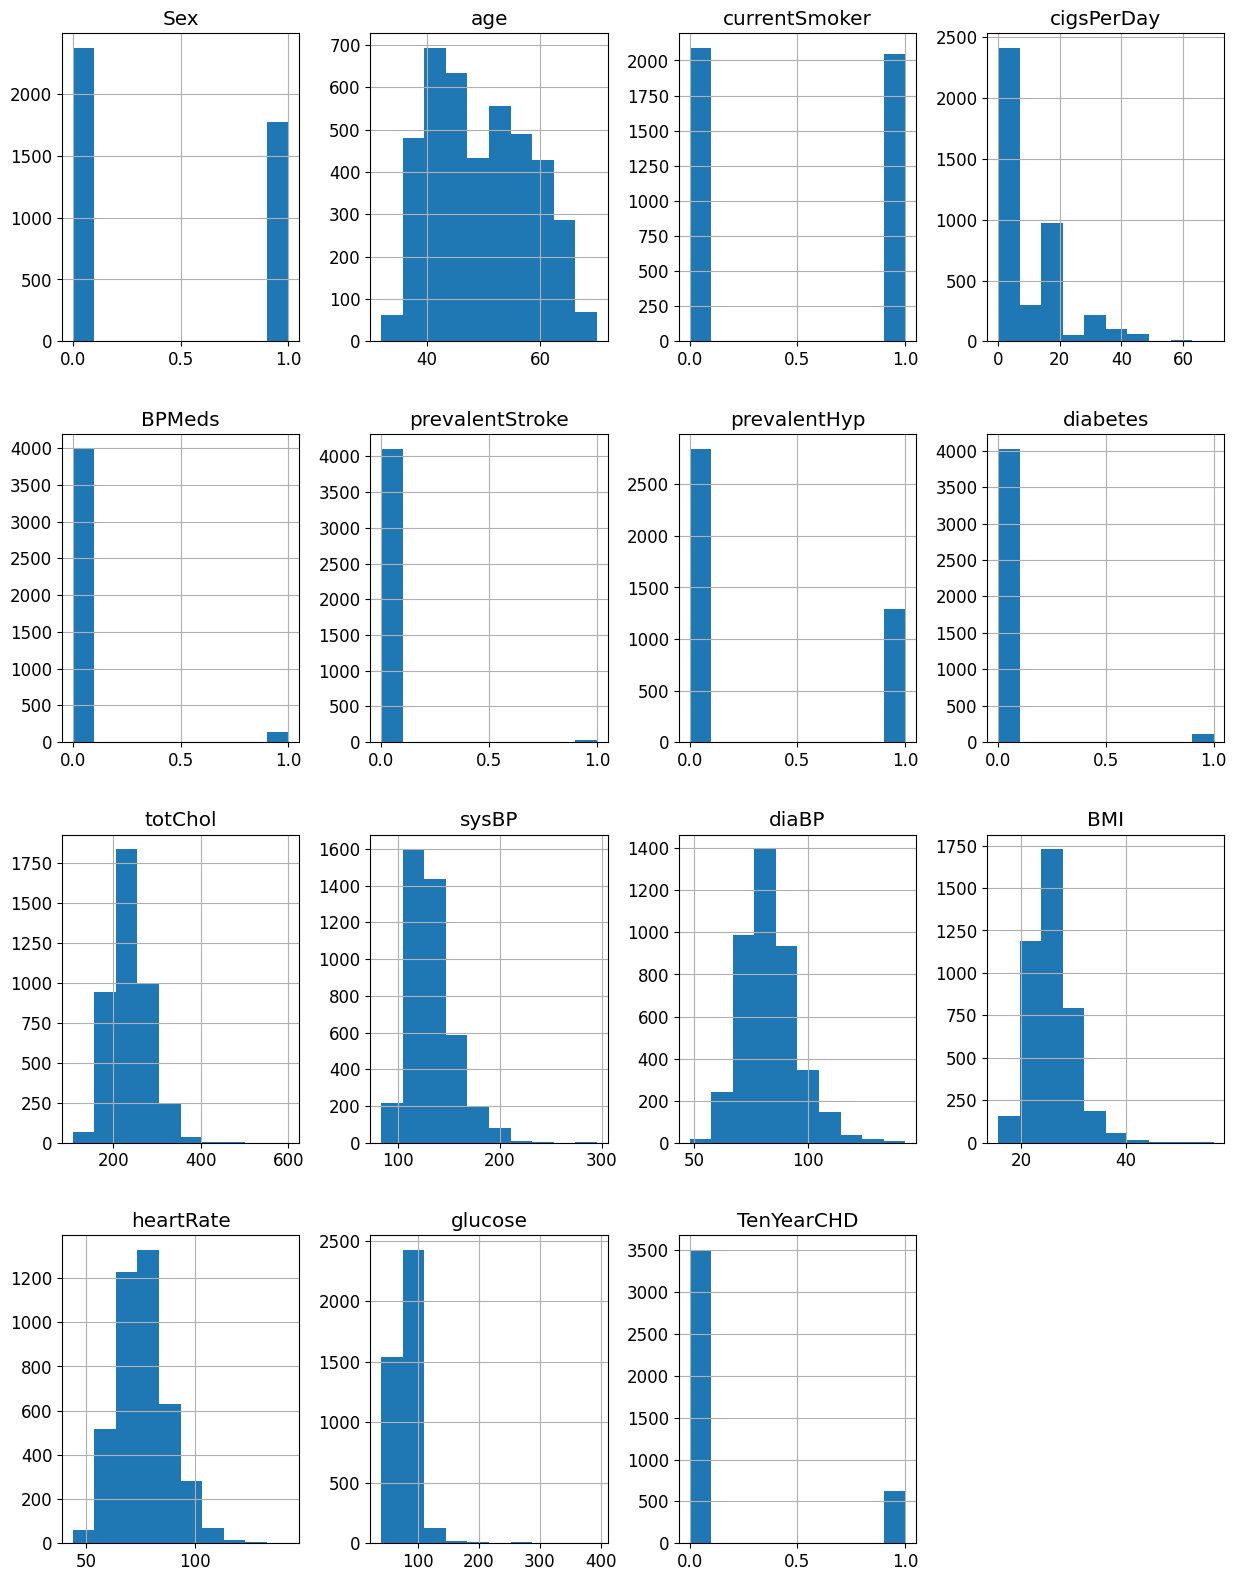

In [111]:
#Histograms for every column
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

(4135, 15)
[[ 1.22474487 -1.28931674 -1.         -0.96754461         nan         nan
  -0.81649658         nan -1.41062997 -1.27734618 -1.15306967  0.05752806
   0.14484136 -0.70928138 -0.5       ]
 [-0.81649658 -0.34918995 -1.         -0.96754461         nan         nan
  -0.81649658         nan  0.20235648 -0.63004237 -0.35029965  0.58486866
   1.59325501 -0.8106073  -0.5       ]
 [ 1.22474487 -0.0805823   1.          0.60569866         nan         nan
  -0.81649658         nan  0.05572135 -0.34954405 -0.42327874 -0.43086123
  -0.33796318 -1.41856277 -0.5       ]
 [-0.81649658  1.66536746  1.          1.39232029         nan         nan
   1.22474487         nan -0.53081918  0.62141165  0.67140766  0.53992486
  -1.30357228  1.92519233  2.        ]
 [-0.81649658 -0.34918995  1.          0.84168515         nan         nan
  -0.81649658         nan  1.22880241 -0.24166009 -0.13136237 -1.10202199
   0.62764591  0.10132591 -0.5       ]
 [-0.81649658 -0.75210143 -1.         -0.96754461     

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


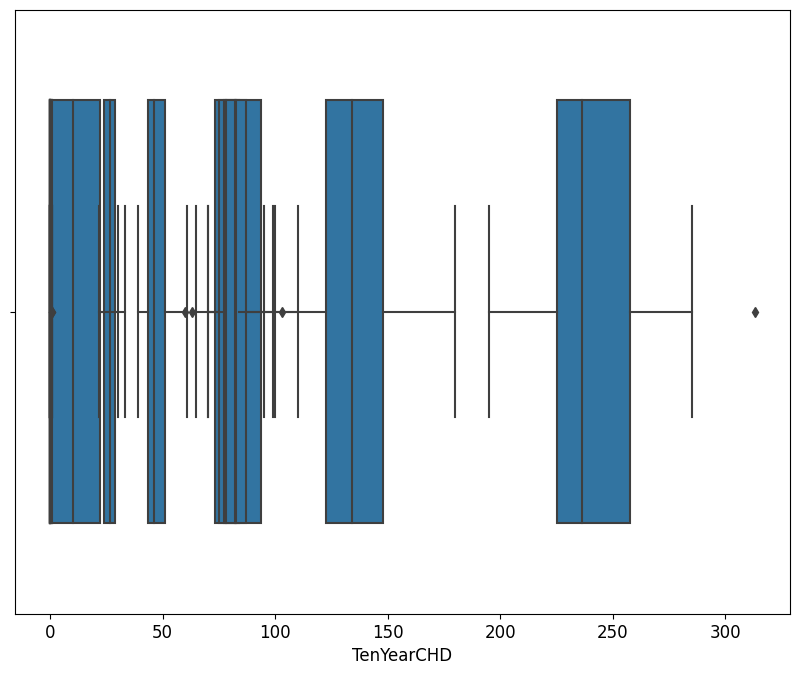

In [112]:
#IDENTIFY AND REMOVE OUTLIERS
#identify outliers using BoxPlot for each variable
from matplotlib.cbook import boxplot_stats
from scipy import stats

df2 = df.head(10)

#initial shape
print(df.shape) 
# graph outliers for all columns in just one graph with axis x = TenYearCHD
for i in df2.columns:
  sns.boxplot(x=df2[i], width=0.7)

#calculate z score 
z_scores = stats.zscore(df2)
print(z_scores)





#outliers
#   outliers = [y for stat in boxplot_stats(df2[i]) for y in stat['fliers']]
#   if len(outliers) > 1:
#     print("Total Outliers for " + i + '=' , len(outliers))
#     print("Outliers for " + i + '=' , outliers)
#     print(df2[i].isin(outliers))
#     print(np.array(outliers)) 
# # df.drop(df2[i].isin(outliers).index, inplace = True)
   
# #final shape
# print(df2)
# print(df.shape)

#get indexes of outliers for each variable (outliers.includes(item['hearRate']))
# remove only if row includes two or more outliers
#drop those items
# dataframe.drop( row_index, inplace = True

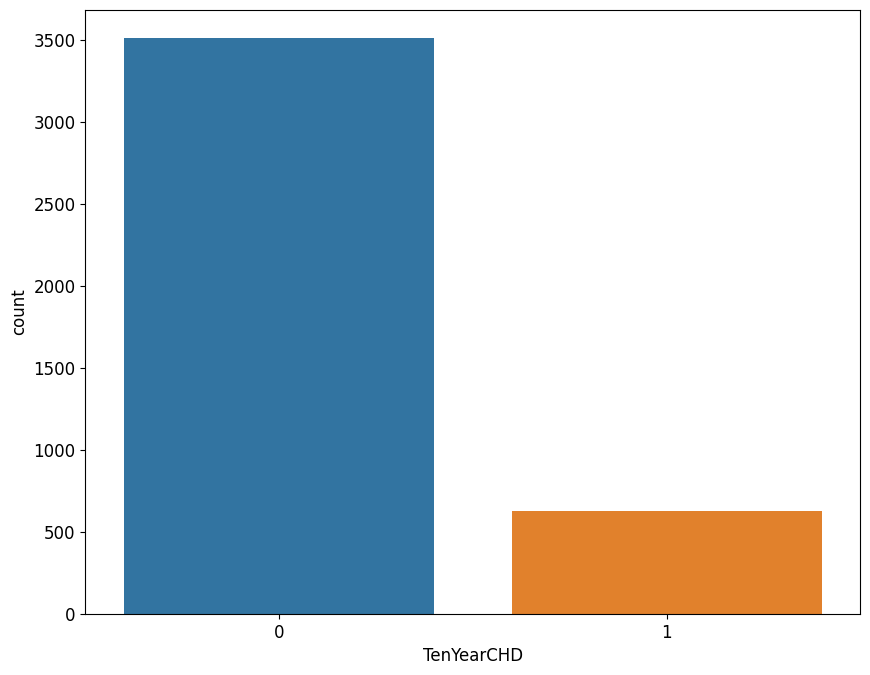

In [113]:
#Histogram of Target Variable
sns.countplot(x='TenYearCHD',data=df)

In [ ]:
sns.pairplot(data=df)

In [ ]:
pd.crosstab(df.age,df.TenYearCHD).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show() # Orange Boxes show Higher Correlations Between the Variables

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.age,y=df.prevalentStroke,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Stroke Prevalence',fontsize = 15,color='blue')
plt.title('The Prevalence of Stroke based on Age',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.totChol,y=df.prevalentStroke,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Stroke Prevalence',fontsize = 15,color='blue')
plt.title('The Prevalence of Stroke based on Age',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df.cigsPerDay,y=df.prevalentStroke,color='red',alpha=0.8)
plt.xlabel('Cigs per Day',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Stroke Prevalence',fontsize = 15,color='blue')
plt.title('The Frequency of Stroke Prevalence based on the Amount of Cigs per Day',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
samp=df.sample(frac=0.5, replace=True, random_state=1) # Took 50% sample of original dataset
#Constructing Scatter plot: Original thought prior to FHS was that BMI was affected by age
y= samp['BMI']
x= samp['age']
plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('The impact of BMI based on Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

In [ ]:
#Constructing Scatter plot: Original thought prior to FHS was that Hypertension was affected by age
plt.figure(figsize=(10,5))
sns.pointplot(x=df.age,y=df.prevalentHyp,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('HyperTension Prevalence',fontsize = 15,color='blue')
plt.title('Age vs HyperTension Prevalence',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [ ]:
plt.scatter(x=df.age[df.TenYearCHD==1], y=df.heartRate[(df.TenYearCHD==1)], c="red")
plt.scatter(x=df.age[df.TenYearCHD==0], y=df.heartRate[(df.TenYearCHD==0)])
plt.legend(["CHD", "No CHD"])
plt.xlabel("Age")
plt.title('The Prevalence of Heart Disease based on Age and Heart Rate')
plt.ylabel("Max Heart Rate")
plt.show()

In [ ]:
pd.crosstab(df.Sex,df.TenYearCHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frequency of Heart Disease based on Sex')
plt.xlabel('Sex (F=0,M=1)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency of Heart Disease Diagnosis')
plt.show()

In [ ]:
df.dtypes

In [ ]:
pd.crosstab(df.currentSmoker,df.TenYearCHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frequency of Heart Disease based on Smoking')
plt.xlabel('Smoking Status')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency of Heart Disease Diagnosis')
plt.show()

In [ ]:
pd.crosstab(df.cigsPerDay,df.TenYearCHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frequency of Heart Disease based on Smoking Habits')
plt.xlabel('Number of Cigarettes')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency of Heart Disease Diagnosis')
plt.show()

In [ ]:
pd.crosstab(df.BPMeds,df.TenYearCHD).plot(kind="bar",figsize=(15,6),color=['cyan','#BD2281' ])
plt.title('Heart Disease Frequency based on usage of BP Treatment')
plt.xlabel('Blood Pressure Medication (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Creating Logistic Regression Model: 
Part 1 - Splitting Data

In [ ]:
#Creating Dependent and Independent Variables : TenYrCHD is the target value
X = df.drop(['TenYearCHD'], axis = 1)
Y = df.TenYearCHD.values

In [ ]:
x = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [ ]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state=10) #split the data 80-20

In [ ]:
# Fitting Logistic Model
model = LogisticRegression(solver='liblinear', C=10.0,random_state=1)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Logistic regression Model Accuracy Rate: {:.2f}'.format(model.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) # True negatives in the upper-left position, False negatives in the lower-left positionm, False positives in the upper-right position, True positives in the lower-right position
print(classification_report(y_test, y_pred))

In [ ]:
model.intercept_ # y intercept

In [ ]:
model.coef_ # slope

In [ ]:
model.predict_proba(X) # Predicts probability that the prediction is either 0 or 1 

In [ ]:
model.predict_proba(X).size

In [ ]:
y_pred # predictions

In [ ]:
model.score(X, Y)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc #for model evaluation

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
auc(fpr, tpr)

In [ ]:
# Check for imbalance bc of low auc score and low rate of true positive ones
df.TenYearCHD.value_counts().plot.pie(autopct='%.2f')

In [ ]:
pip install imbalanced-learn

In [ ]:
count_class_0, count_class_1 = df.TenYearCHD.value_counts()

# Divide by class
df_class_0 = df[df['TenYearCHD'] == 0]
df_class_1 = df[df['TenYearCHD'] == 1]

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TenYearCHD.value_counts())

df_test_under.TenYearCHD.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
# Try to undersample Data to fix imbalance and retry predictive models
from imblearn.under_sampling import RandomUnderSampler
ru= RandomUnderSampler(random_state=42, replacement=True)
x_ru,y_ru= ru.fit_resample(X,Y)
print("Original Df shape : ", y.shape)
print('Current Df shape: ', y_ru.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ru,y_ru, test_size = .2, random_state=10) #split the data 80-20

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0,random_state=1)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print('Logistic regression Model Accuracy Rate: {:.2f}'.format(model.score(X_test, y_test)))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [ ]:
auc(fpr, tpr) # Accuracy was lowered but it was more accurate

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
rf_pred = rf.predict(X_test)
print('AUC score is: ', roc_auc_score(y_test,rf_pred))
print('The Accuracy score is: ', accuracy_score(y_test, rf_pred))

Target Variable Data is Unbalanced : Undersampling vs Oversampling

In [ ]:
#UnderSampling
from imblearn.under_sampling import NearMiss
nm= NearMiss()
x_nm,y_nm=nm.fit_resample(X,Y)
print("Original Df shape: ", Y.shape)
print('Current Df shape: ', y_nm.shape)

In [ ]:
#OVersampling
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote= smote.fit_resample(X,Y)
print("Original Df shape : ", Y.shape)
print('Current Df shape: ', y_smote.shape)

Testing Algorithms(LogReg, SVC, Forest) and Evaluations After SMOTE

Data Splt : 80%/20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size = .2, random_state=10) #split the data 80-20

Logistic Regressions

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0,random_state=1)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print('Logistic regression Model Accuracy Rate: {:.2f}'.format(model.score(X_test, y_test)))

Poly SVC with C=100

In [ ]:
from sklearn.svm import SVC
poly_svc=SVC(kernel='poly', C=100.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Accuracy Score with poly kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
rf_pred = rf.predict(X_test)
print('AUC score is: ', roc_auc_score(y_test,rf_pred))
print('The Accuracy score is: ', accuracy_score(y_test, rf_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
#Checking Feature importance
model=LogisticRegression(random_state=1)
model.fit(X,y)
feature_importance=pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
